**Title: The relationship between attributes of clients and their willingness on subscribing bank term deposit**

In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

**Introduction**\
----Relevant background on topic\
--------This data was gathered from a direct marketing campaign of a Portuguese baking institution.\
--------The bank collected information from their clients over the phone, and more than one contact to  the same client was required. \
----State question we are trying to answer \
--------Initial question: Which variable most influences whether or not someone will subscribe to a term deposit.\
--------Main question: Which demographic of a client is best (i.e. who is the most likely to subscribe a term deposit)\
----Identify and describe dataset\
--------The Bank Marketing Dataset discusses multiple characteristics of clients of a bank in hopes to predict whether they will subscribe to a term deposit. Variables in the set include age, job, education, marital status, and more.

**Preliminary Exploratory Data Analysis**\
----Show that dataset can be read from web into R\
--------library(tidyverse)\
--------Bank_marketing <- read_csv(“...”)\
----Put data into tidy format\
--------The data we used was already tidy when downloaded\
----Using only training data\
--------Summarize data in at least one table\
--------Visualize data with at least one plot

**Methods**\
----Explain how you’ll conduct data analysis and which variables/columns you’ll use\
--------Variables to consider: age, balance, job, education, housing loan, personal loan\
--------To perform the full analysis, a classification will be done on the data for the new observation (likeliness to subscribe to a bank term deposit) and K-nearest neighbours will be used to predict a value for the new observation.\
----Describe at least one way that you’ll visualize results\
--------Use scatter point graphs with different point colors

In [4]:
temp <- tempfile()
temp2 <- tempfile()

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip"

download.file(url, temp)
unzip(zipfile = temp, exdir = temp2)
bank_data <- read_csv2(file.path(temp2, "bank.csv")) %>%
    mutate(y = as_factor(y))
unlink(c(temp, temp2))
bank_data

Using ',' as decimal and '.' as grouping mark. Use read_delim() for more control.

Parsed with column specification:
cols(
  age = col_double(),
  job = col_character(),
  marital = col_character(),
  education = col_character(),
  default = col_character(),
  balance = col_double(),
  housing = col_character(),
  loan = col_character(),
  contact = col_character(),
  day = col_double(),
  month = col_character(),
  duration = col_double(),
  campaign = col_double(),
  pdays = col_double(),
  previous = col_double(),
  poutcome = col_character(),
  y = col_character()
)



age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [5]:
bank_split <- initial_split(bank_data, prop = 0.75, strata = age)  
bank_train <- training(bank_split)   
bank_test <- testing(bank_split)
head(bank_train)
bank_train

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no


age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
32,services,single,secondary,no,473,yes,no,cellular,7,jul,624,5,-1,0,unknown,no
57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


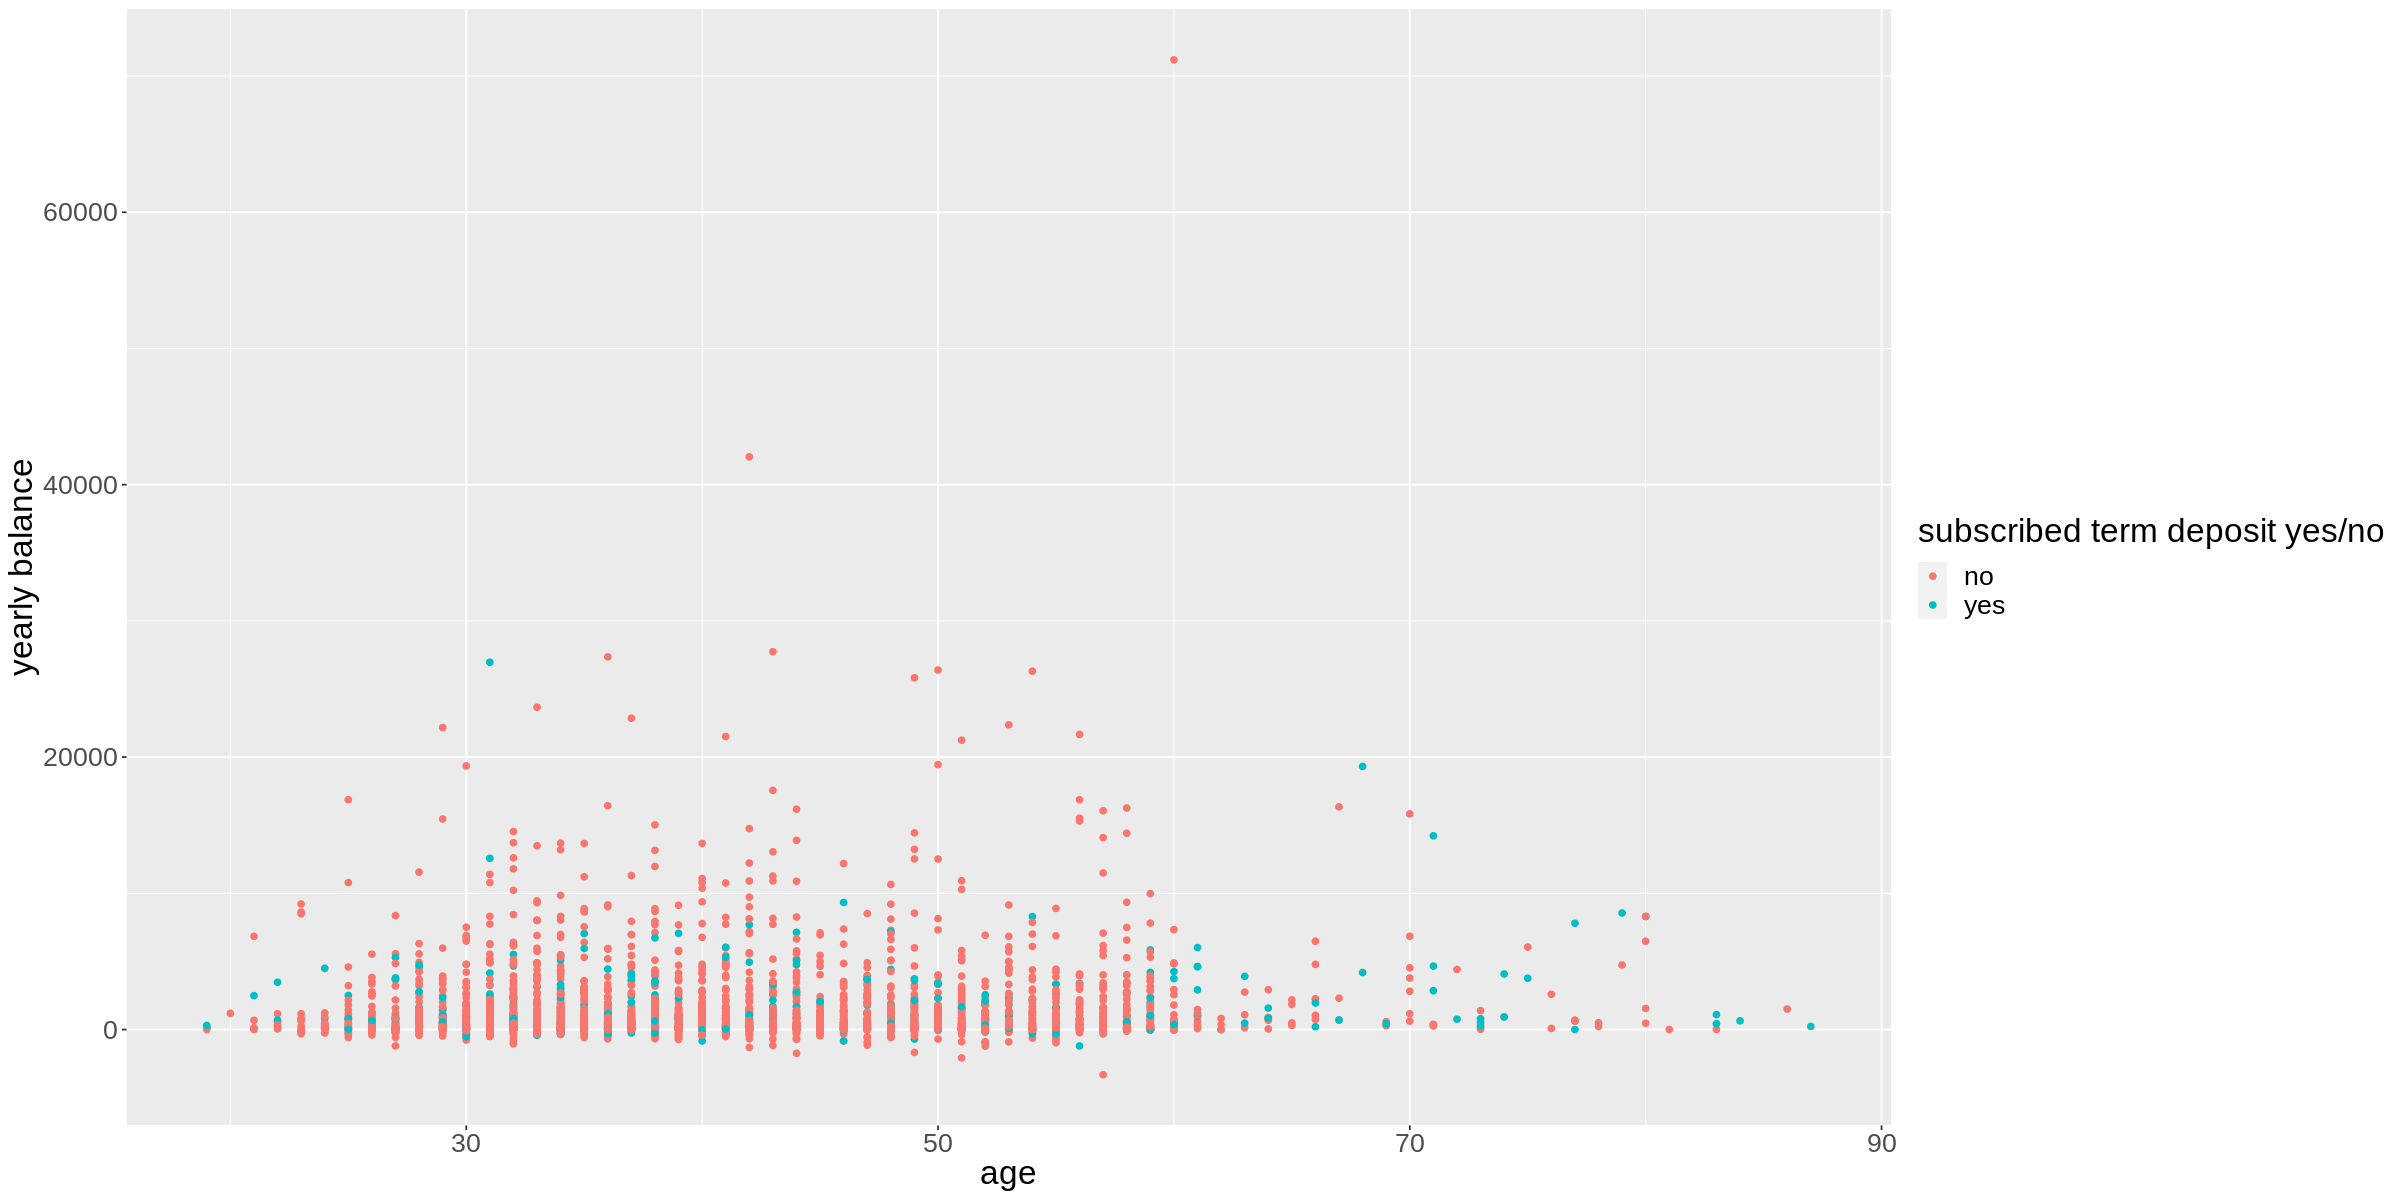

In [4]:
options(repr.plot.width = 20, repr.plot.height = 10) 
age_vs_balance_plot <- bank_train %>%
    ggplot(aes(x = age, y = balance)) +
    geom_point(aes(colour = y)) + 
    labs(x = "age", y = "yearly balance",
        colour = "subscribed term deposit yes/no") +
    theme(text = element_text(size = 20))
age_vs_balance_plot

This is a sample plot demonstrating the relationship between age and yearly balance and whether or not each person has subscribed to a bank term deposit. The variables age and balance were chosen to see if there is any relationship between the two variables.

For our project we intend to plot multiple different variables in order to determine which variables are best suited to determine if someone will subscribe to a bank term deposit. The best variables will be chosen based on the relationship demonstrated on the graph. For instance, if there is a strong positive relationship on the plot then that would signify that the variable is a strong indicator of whether or not someone will subscribe to a bank term deposit. On the other hand, if there is a weak or negative relationship, then that would indicate that the variable is not suitable to determine whether or not someone will subscribe to a bank term deposit.

**Expected Outcomes & Significance**\
----What do you expect to find\
--------Use the variables we chose to predict whether a client will subscribe to a term deposit, and therefore find which variable influenced the will of a client on subscribing a term deposit the most. After finishing the model we will check our predictions with the real data to see how accurate our predictions are.\
----What impact will your findings have\
--------We can use this data to predict groups who are more interested in the bank promotion. So we can target them when the bank decides to do marketing strategy.\
----What future questions could this lead to\
--------Are there any other predicates to add for choosing the strategy?\
--------Some of predicates will disturb this data results\
--------How do different variables intersect with one another to impact whether or not someone will subscribe to a bank deposit\
--------Is there a better model to predict this data?